In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/bitcoin/results.csv')
df.sort_values(['model'])

,model,MSE,MAE,R2_score,MAPE,time frame,type
5,Arima,9.475766e+05,807.973482,-0.114735,0.086864,2015_2019,h
6,Arima,1.589004e+09,35780.719331,-4.145886,0.432990,2015_2025,h
0,Lstm,1.389904e+05,264.869904,0.663615,0.031106,2015_2019,h
1,Lstm,1.235698e+07,2656.415283,0.959166,0.030248,2015_2025,h
13,Lstm,2.924758e+05,441.796814,0.292148,0.052508,2015_2019,hs
16,PatchTST,2.257980e+05,327.752819,0.732505,0.037207,2015_2019,h
14,PatchTST,6.984010e+06,2034.206796,0.977383,0.026471,2015_2025,h
19,TSTPlus,1.032170e+07,2518.865053,0.966574,0.031627,2015_2025,h
18,TSTPlus,2.130972e+05,376.687533,0.747551,0.040419,2015_2019,h
17,TSTPlus,1.223373e+05,271.269065,0.855071,0.030337,2015_2019,hs


In [11]:
df = df[(df['model'] !='Arima') & (df['model'] != 'prophtet')]
metrics = ['MSE','MAE','R2_score', 'MAPE']

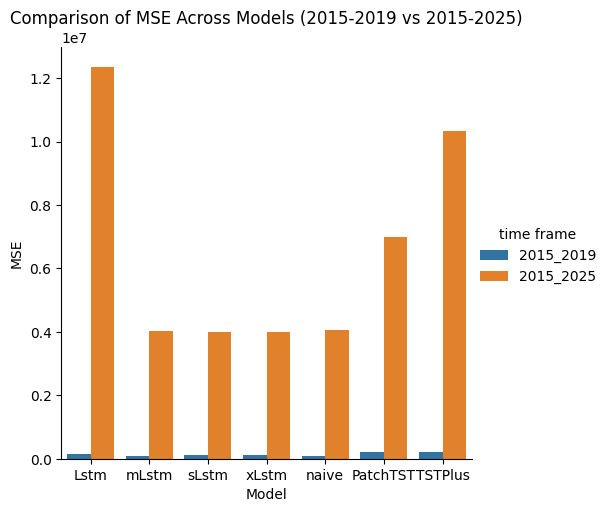

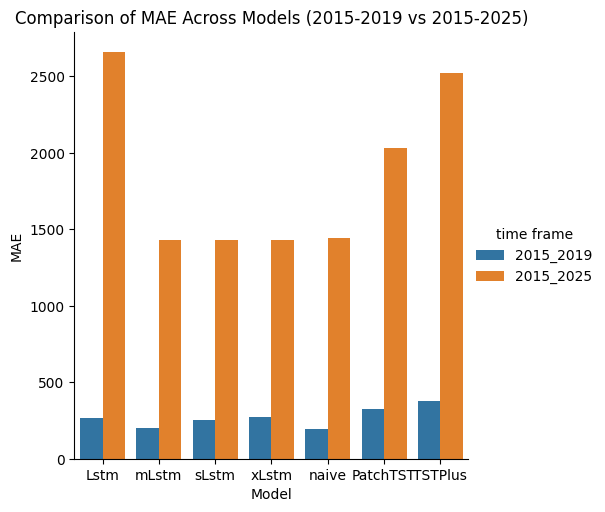

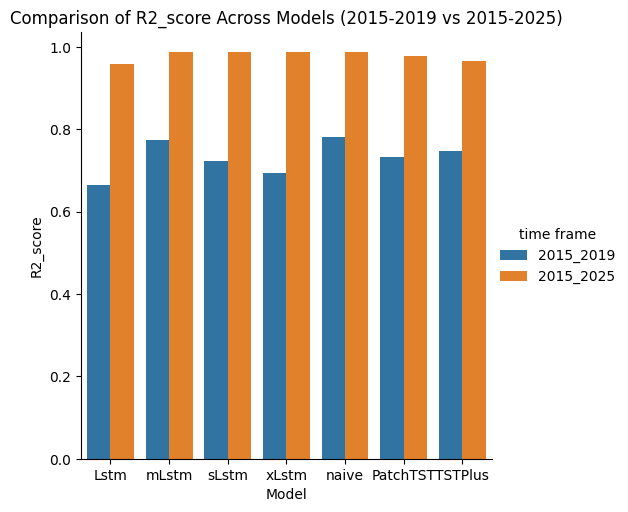

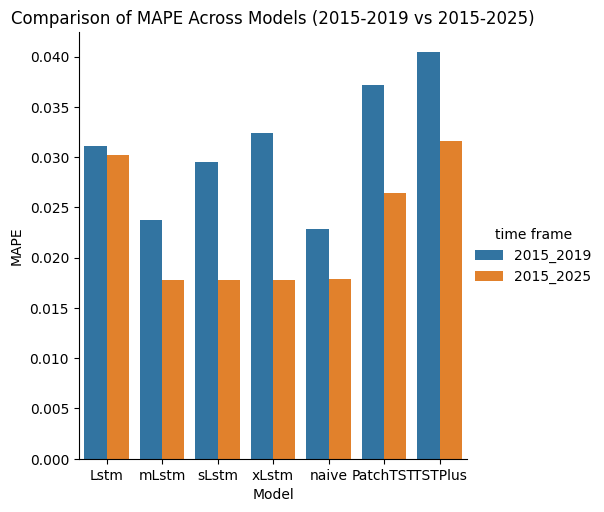

In [12]:
# Select the first metric from the metrics list
metric = metrics[0]  # Ensure 'metrics' is properly defined before using this
for metric in metrics:
    # Filter the DataFrame to include only rows where 'type' is 'h'
    df_h = df[df['type'] == 'h']

    # Create a categorical bar plot comparing the 2015-2019 and 2015-2025 models
    sns.catplot(
        data=df_h,
        x="model",
        y=metric,
        hue="time frame",
        kind="bar"
    )

    # Set title and labels for better clarity
    plt.title(f"Comparison of {metric} Across Models (2015-2019 vs 2015-2025)")
    plt.xlabel("Model")
    plt.ylabel(metric)
    plt.savefig(f"Comparison of {metric} Across Models (2015-2019 vs 2015-2025).jpg")
    # Show the plot
    plt.show()


In [32]:
df_2015_2019[df_2015_2019['type']=='hs'].to_csv('df_2015_2019.csv', index='False')

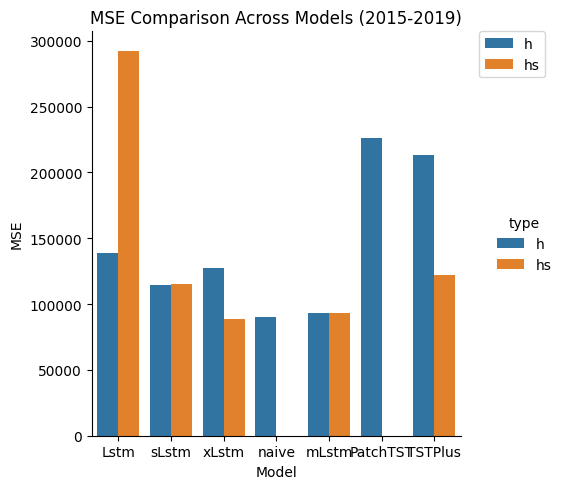

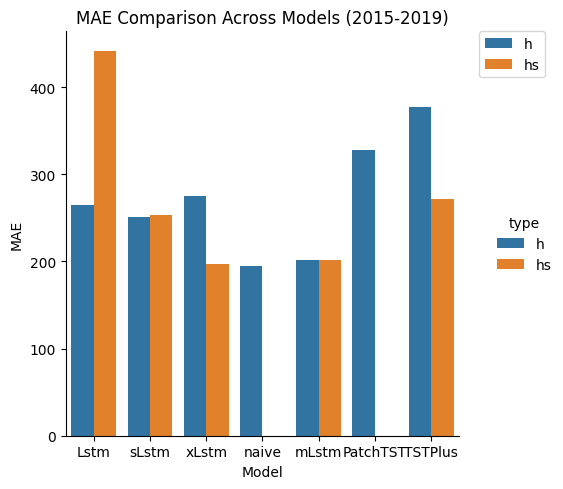

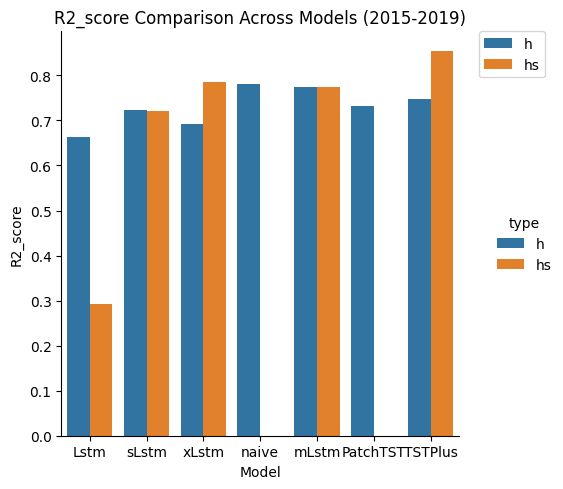

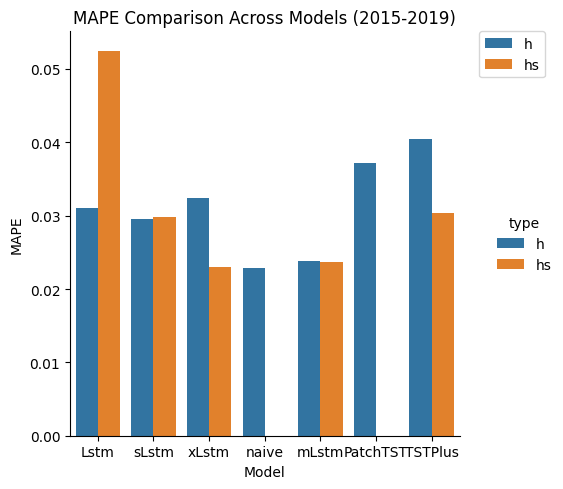

In [23]:
# Select the first metric from the metrics list
metric = metrics[0]  # Ensure 'metrics' is properly defined before using this
for metric in metrics:
    # Filter the DataFrame to include only rows where 'time frame' is '2015_2019'
    df_2015_2019 = df[df['time frame'] == '2015_2019']

    # Create a categorical bar plot to comparing  the historacal and sentiment models
    sns.catplot(
        data=df_2015_2019,  # Filtered dataset
        x="model",  # X-axis represents different models
        y=metric,  # Y-axis represents R² score for performance evaluation
        hue="type",  # Different colors represent different types
        kind="bar"  # Bar chart for categorical comparisons
    )

    # Set title and axis labels for better clarity
    plt.title(f"{metric} Comparison Across Models (2015-2019)")
    plt.xlabel("Model")
    plt.ylabel(metric)

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.tight_layout()
    plt.savefig(f"{metric} Comparison Across Models (2015-2019).jpg", bbox_inches='tight')
    # Show the plot
    plt.show()


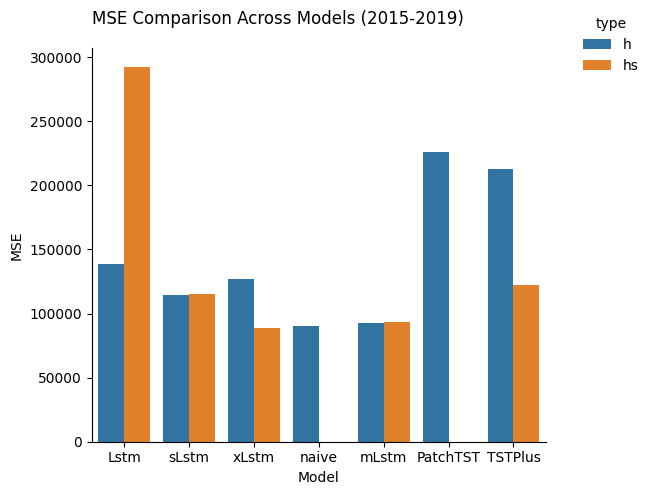

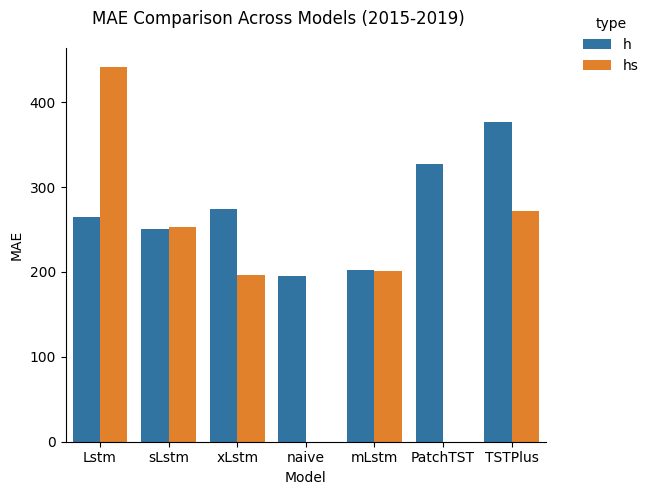

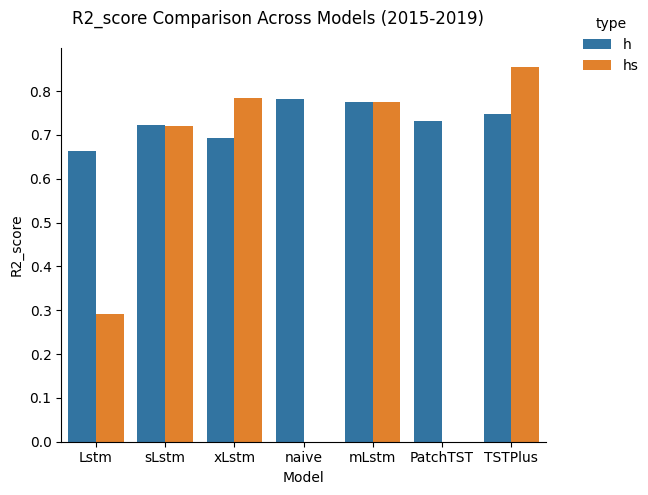

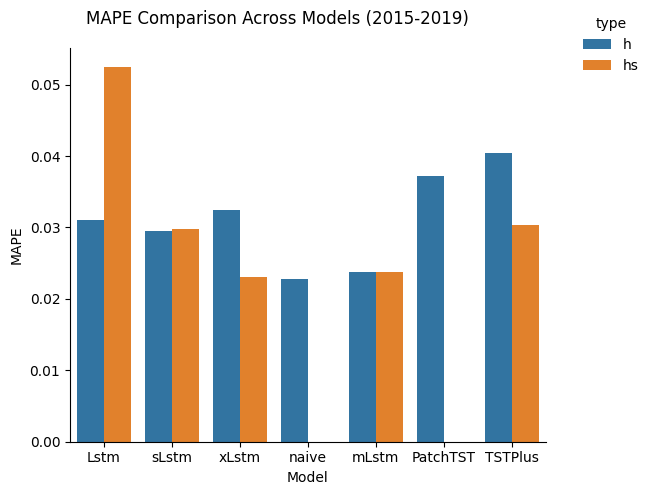

In [30]:
for metric in metrics:
    df_2015_2019 = df[df['time frame'] == '2015_2019']

    # Store the catplot in 'g'
    g = sns.catplot(
        data=df_2015_2019,
        x="model",
        y=metric,
        hue="type",
        kind="bar"
    )

    # Set title and labels (use g.fig for figure-level adjustments)
    g.fig.suptitle(f"{metric} Comparison Across Models (2015-2019)")
    g.set_axis_labels("Model", metric)

    # Adjust legend position (bbox_to_anchor moves it outside the plot)
    #plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

    # Alternatively, use Seaborn's legend control:
    g._legend.set_bbox_to_anchor((1.15, 0.9))  # Manually adjust position

    plt.tight_layout()
    plt.savefig(f"{metric} Comparison Across Models (2015-2019).jpg", bbox_inches='tight')
    plt.show()

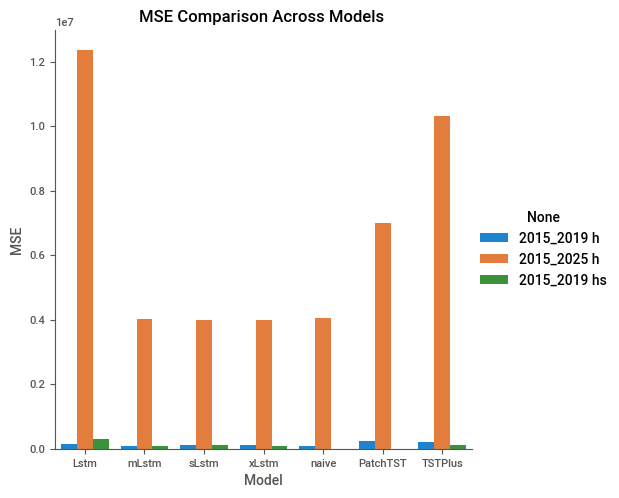

In [ ]:
# Select the first metric from the metrics list
metric = metrics[0]  # Ensure 'metrics' is properly defined before using this

# Create a categorical bar plot to comparing  the  models
sns.catplot(
    data=df,  # Filtered dataset
    x="model",  # X-axis represents different models
    y=metric,  # Y-axis represents R² score for performance evaluation
    hue=df['time frame'] +' '+df['type'],  # Different colors represent different types
    kind="bar"  # Bar chart for categorical comparisons
)

# Set title and axis labels for better clarity
plt.title(f"{metric} Comparison Across Models ")
plt.xlabel("Model")
plt.ylabel(metric)

# Show the plot
plt.show()

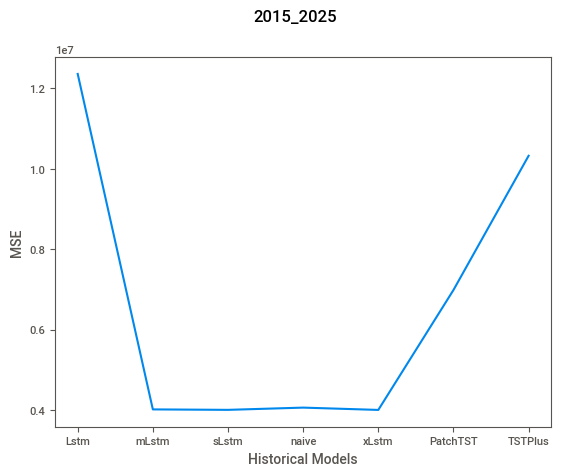

In [ ]:
df_2015_2025 = df[(df['time frame']=='2015_2025')]
metric = metrics[0]
# Create figure
figure = plt.figure()
figure.suptitle("2015_2025")
plt.xlabel('Historical Models')
plt.ylabel(metric)
# Plot with Seaborn
sns.lineplot(x=df_2015_2025['model'], y=df_2015_2025[metric],)

# Show plot
plt.show()

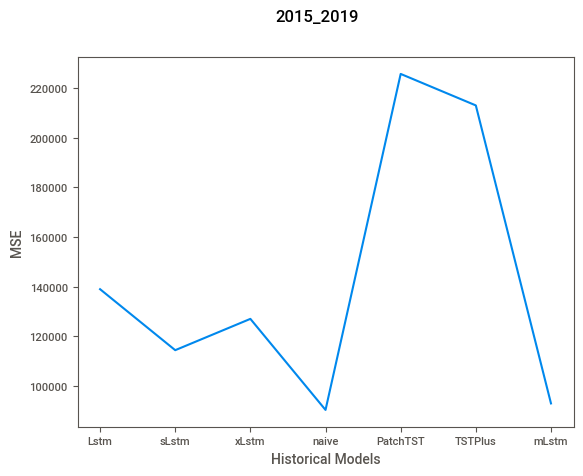

In [ ]:
df_2015_2019_h = df[(df['time frame']=='2015_2019')&(df['type']=='h')]
metric = metrics[0]
# Create figure
figure = plt.figure()
figure.suptitle("2015_2019")
plt.xlabel('Historical Models')
plt.ylabel(metric)
sns.lineplot(x=df_2015_2019_h['model'], y=df_2015_2019_h[metric],)

# Show plot
plt.show()

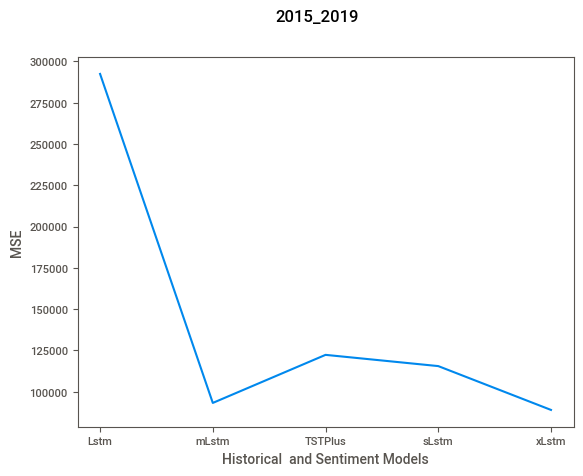

In [ ]:
df_2015_2019_hs = df[(df['time frame']=='2015_2019')&(df['type']=='hs')]
metric = metrics[0]
# Create figure
figure = plt.figure()
figure.suptitle("2015_2019")
plt.xlabel('Historical  and Sentiment Models')
plt.ylabel(metric)
# Plot with Seaborn
sns.lineplot(x=df_2015_2019_hs['model'], y=df_2015_2019_hs[metric],)
# Show plot
plt.show()